# Importing Libraries

In [453]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Reading the dataset

In [454]:
df=pd.read_csv(r"C:\Users\barath\OneDrive\Desktop\data_regression.csv",encoding='latin 1')

# Exploratory Data Analysis

In [455]:
df.head()

,ï»¿year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [456]:
df['year']=df['ï»¿year']

In [457]:
df.head()

,ï»¿year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,2015
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,2015
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,2015
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,2015
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,2015


In [458]:
df.drop(columns=['ï»¿year'],inplace = True)

In [459]:
df.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,2015
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,2015
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,2015
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,2015
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,2015


In [460]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,1.0])

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000,2000.0
mean,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333,2015.0
std,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021,0.0
min,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,2015.0
25%,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000,2015.0
50%,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000,2015.0
75%,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000,2015.0
90%,911009.600000,52.00000,151.000000,372.915000,13.700000,42.262000,125.000000,8.000000,4.000000,3.000000,1.000000,2015.0
100%,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000,2015.0
max,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000,2015.0


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2000 non-null   int64  
 1   phone_no                2000 non-null   object 
 2   gender                  1976 non-null   object 
 3   age                     2000 non-null   int64  
 4   no_of_days_subscribed   2000 non-null   int64  
 5   multi_screen            2000 non-null   object 
 6   mail_subscribed         2000 non-null   object 
 7   weekly_mins_watched     2000 non-null   float64
 8   minimum_daily_mins      2000 non-null   float64
 9   maximum_daily_mins      2000 non-null   float64
 10  weekly_max_night_mins   2000 non-null   int64  
 11  videos_watched          2000 non-null   int64  
 12  maximum_days_inactive   1972 non-null   float64
 13  customer_support_calls  2000 non-null   int64  
 14  churn                   1965 non-null   

In [462]:
df['gender'].value_counts()



Male      1053
Female     923
Name: gender, dtype: int64

In [463]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [464]:
df['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [465]:
df['mail_subscribed'].value_counts()

no     1430
yes     570
Name: mail_subscribed, dtype: int64

In [466]:
df['year'].value_counts()

2015    2000
Name: year, dtype: int64

In [467]:
df.shape

(2000, 16)

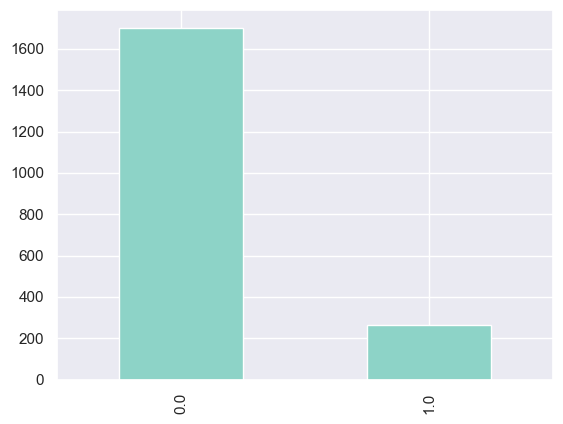

In [468]:
# EDA

df['churn'].value_counts().plot(kind='bar')
sns.set()
sns.set_palette("Set3")

In [469]:
gender_counts=df['gender'].value_counts()

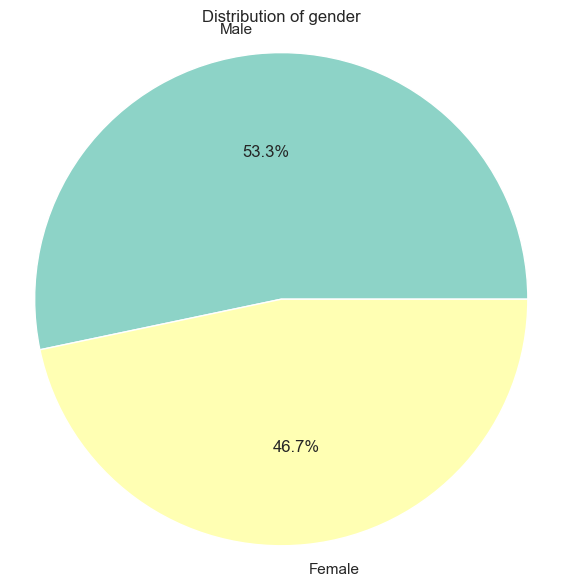

In [470]:
plt.figure(figsize=(7,7))  # Optional: Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Optionally, add Seaborn styling
sns.set()
sns.set_palette("Set3")

plt.show()

In [471]:
correlation=df.corr()

C:\Users\barath\AppData\Local\Temp\ipykernel_23636\1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


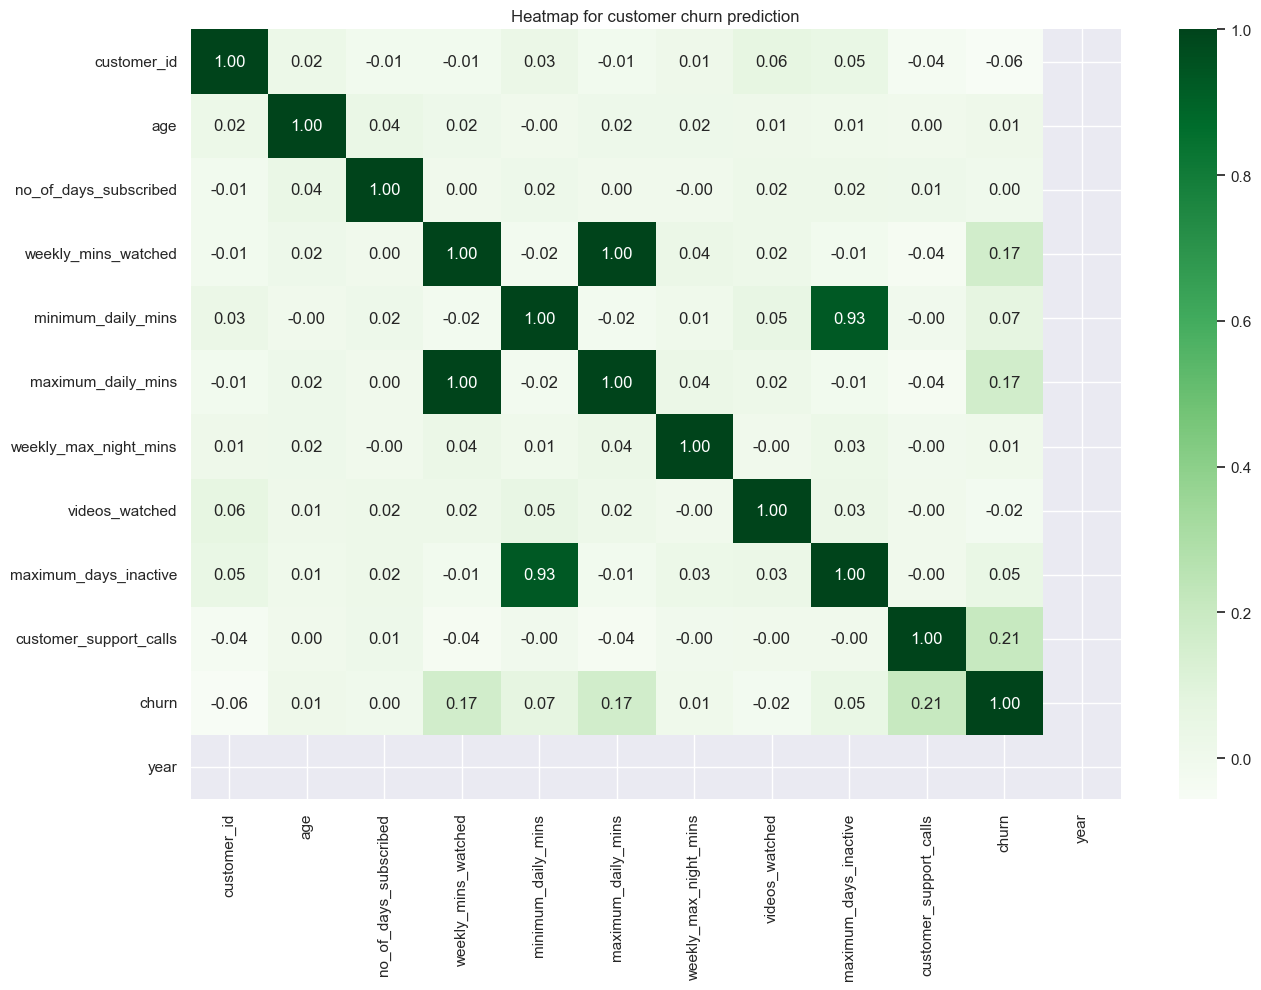

In [472]:
cmap='Greens'
plt.figure(figsize=(15,10))
sns.heatmap(correlation,cmap=cmap,annot=True,fmt=".2f")
plt.title("Heatmap for customer churn prediction")
plt.show()

In [473]:
boxplot=df[['no_of_days_subscribed','weekly_mins_watched','minimum_daily_mins','maximum_daily_mins','weekly_max_night_mins','videos_watched','maximum_days_inactive','customer_support_calls']]

Text(0.5, 1.0, 'Boxplot for Each Variable')

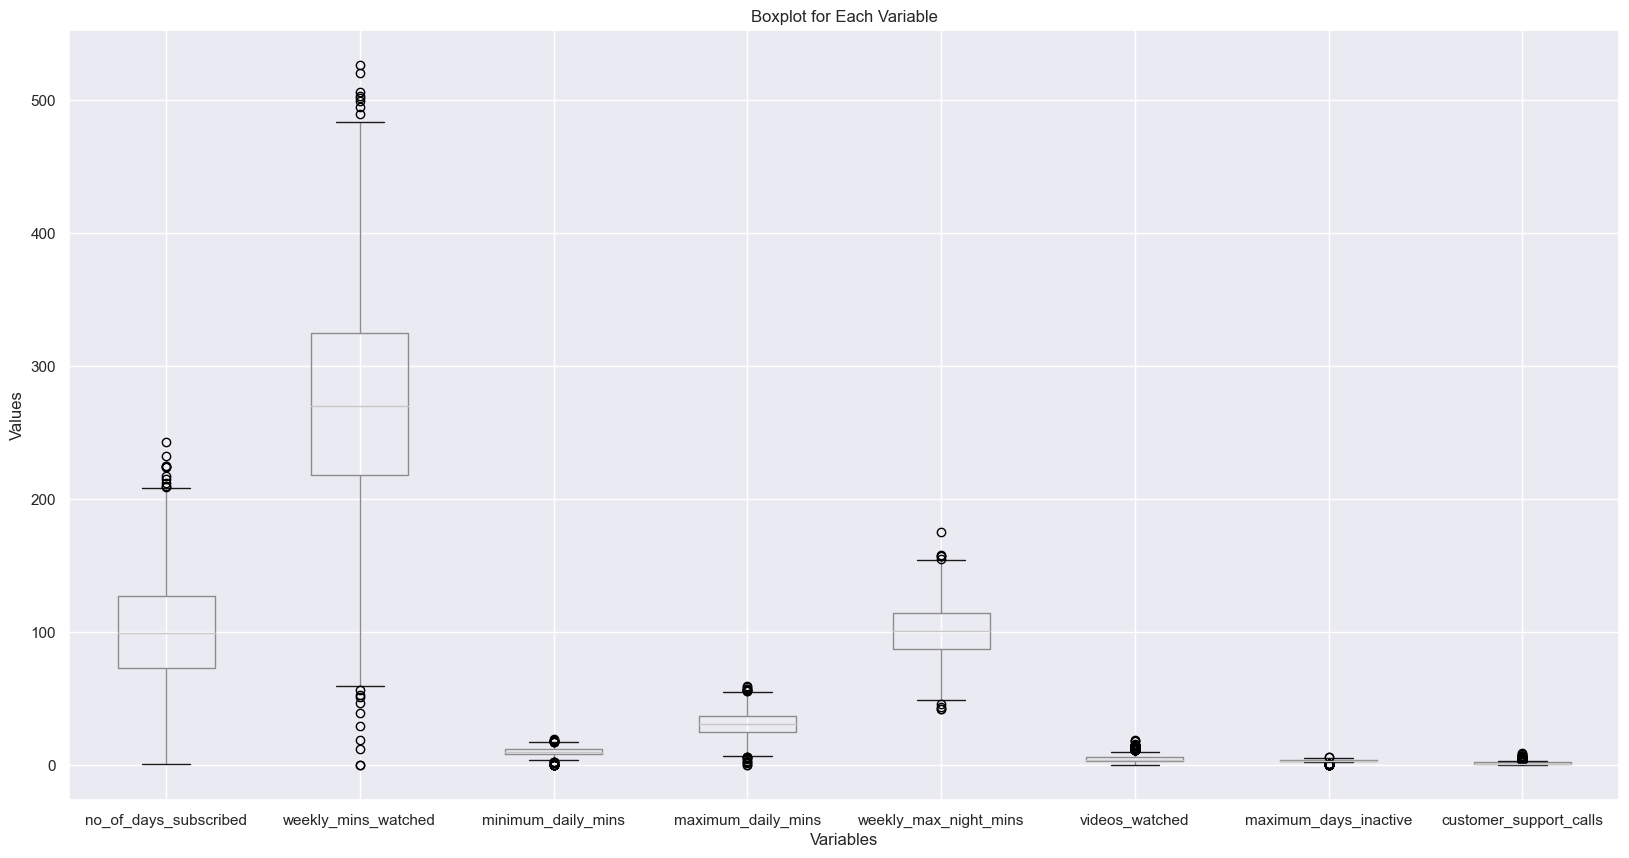

In [474]:
plt.figure(figsize=(20,10))
boxplot.boxplot()


# Adding labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot for Each Variable')

# Data Preprocessing

In [475]:
df.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,2015
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,2015
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,2015
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,2015
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,2015


In [476]:
df=pd.get_dummies(df,columns=['gender'],prefix='gender')

In [477]:
df.drop(columns='gender_Male',inplace=True)

In [478]:
df.head()

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year,gender_Female
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,2015,1
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,2015,1
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,2015,1
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,2015,1
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,2015,1


In [479]:
df.rename(columns={'gender_Female':'gender'},inplace=True)

In [480]:
df=pd.get_dummies(df,columns=['multi_screen'],prefix='multi_screen')

In [481]:
df.head()

,customer_id,phone_no,age,no_of_days_subscribed,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year,gender,multi_screen_no,multi_screen_yes
0,100198,409-8743,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0.0,2015,1,1,0
1,100643,340-5930,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0.0,2015,1,1,0
2,100756,372-3750,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1.0,2015,1,1,0
3,101595,331-4902,24,131,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,2015,1,1,0
4,101653,351-8398,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0.0,2015,1,1,0


In [482]:
df.drop(columns='multi_screen_no',inplace=True)

In [483]:
df.rename(columns={'multi_screen_yes':'multi_screen'},inplace=True)

In [484]:
df=pd.get_dummies(df,columns=['mail_subscribed'],prefix='mail_subscribed')

In [485]:
df.drop(columns='mail_subscribed_no',inplace=True)

In [486]:
df.rename(columns={'mail_subscribed_yes':'mail_subscribed'},inplace=True)

In [487]:
df.head()

,customer_id,phone_no,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,year,gender,multi_screen,mail_subscribed
0,100198,409-8743,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,2015,1,0,0
1,100643,340-5930,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,2015,1,0,0
2,100756,372-3750,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,2015,1,0,0
3,101595,331-4902,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,2015,1,0,1
4,101653,351-8398,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,2015,1,0,0


In [488]:
columns_to_drop=df[['customer_id','phone_no','year']]


In [489]:
df.drop(columns=columns_to_drop,inplace=True)

In [490]:
df.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender,multi_screen,mail_subscribed
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,1,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,1,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,1,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,1,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,1,0,0


# Feature Selection

In [491]:
correlation_matrix = df.corr()

# Set the correlation threshold
threshold = 0.8

# Create a mask to identify highly correlated features
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1)

# Get a list of features to drop
features_to_drop = [col for col in mask.columns if any(mask[col])]

# Drop highly correlated features from the DataFrame
df_filtered = df.drop(columns=features_to_drop)

In [492]:

df_filtered


,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls,churn,gender,multi_screen,mail_subscribed
0,36,62,82,1,1,0.0,1,0,0
1,39,149,87,3,2,0.0,1,0,0
2,65,126,91,1,5,1.0,1,0,0
3,24,131,102,4,3,0.0,1,0,1
4,40,191,83,7,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
1995,54,75,97,5,2,NaN,1,0,1
1996,45,127,116,3,1,0.0,0,0,0
1997,53,94,110,16,0,0.0,0,0,0
1998,40,94,100,6,3,0.0,0,0,0


In [493]:
df=df_filtered

In [494]:
df

,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls,churn,gender,multi_screen,mail_subscribed
0,36,62,82,1,1,0.0,1,0,0
1,39,149,87,3,2,0.0,1,0,0
2,65,126,91,1,5,1.0,1,0,0
3,24,131,102,4,3,0.0,1,0,1
4,40,191,83,7,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
1995,54,75,97,5,2,NaN,1,0,1
1996,45,127,116,3,1,0.0,0,0,0
1997,53,94,110,16,0,0.0,0,0,0
1998,40,94,100,6,3,0.0,0,0,0


# Handling Null values

In [495]:
df.isna().sum()

age                        0
no_of_days_subscribed      0
weekly_max_night_mins      0
videos_watched             0
customer_support_calls     0
churn                     35
gender                     0
multi_screen               0
mail_subscribed            0
dtype: int64

In [496]:
df=df.dropna()

In [497]:
df

,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls,churn,gender,multi_screen,mail_subscribed
0,36,62,82,1,1,0.0,1,0,0
1,39,149,87,3,2,0.0,1,0,0
2,65,126,91,1,5,1.0,1,0,0
3,24,131,102,4,3,0.0,1,0,1
4,40,191,83,7,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
1992,42,119,76,3,3,0.0,1,0,1
1996,45,127,116,3,1,0.0,0,0,0
1997,53,94,110,16,0,0.0,0,0,0
1998,40,94,100,6,3,0.0,0,0,0


# Handling Outliers

In [499]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [504]:
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls,churn,gender,multi_screen,mail_subscribed
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.0,1421.000000,1421.0,1421.000000
mean,37.738213,98.830401,100.142153,4.227305,1.301900,0.0,0.464462,0.0,0.299789
std,8.676365,39.656306,19.198175,2.085088,0.974855,0.0,0.498911,0.0,0.458327
min,18.000000,1.000000,49.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,31.000000,71.000000,87.000000,3.000000,1.000000,0.0,0.000000,0.0,0.000000
50%,37.000000,98.000000,101.000000,4.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,43.000000,127.000000,114.000000,5.000000,2.000000,0.0,1.000000,0.0,1.000000
90%,49.000000,151.000000,124.000000,7.000000,3.000000,0.0,1.000000,0.0,1.000000
95%,54.000000,166.000000,131.000000,8.000000,3.000000,0.0,1.000000,0.0,1.000000
max,62.000000,209.000000,154.000000,10.000000,3.000000,0.0,1.000000,0.0,1.000000


In [505]:
X=df.drop('churn',axis=1)
y=df['churn']

# Train Test split and Applying SMOTE

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [507]:
y_train_resampled.value_counts()

0    1359
1    1359
Name: churn, dtype: int64

<Axes: >

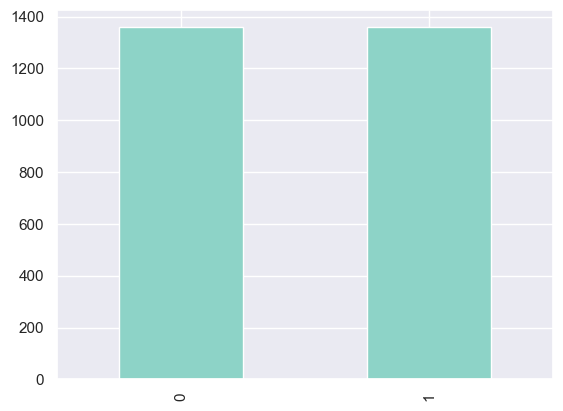

In [508]:
y_train_resampled.value_counts().plot(kind='bar')

# Logistic Regression

C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being se

Accuracy: 0.59

Confusion Matrix:
[[167 118]
 [  0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       285
           1       0.00      0.00      0.00         0

    accuracy                           0.59       285
   macro avg       0.50      0.29      0.37       285
weighted avg       1.00      0.59      0.74       285



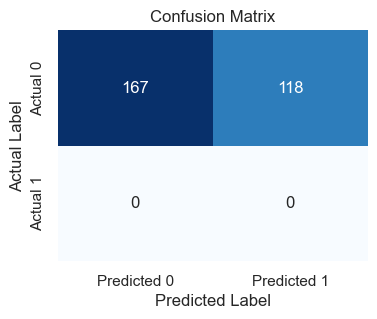

In [509]:


# Create a logistic regression model
model = LogisticRegression()

# Train the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classification

Accuracy: 0.94

Confusion Matrix:
[[269  16]
 [  0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       285
           1       0.00      0.00      0.00         0

    accuracy                           0.94       285
   macro avg       0.50      0.47      0.49       285
weighted avg       1.00      0.94      0.97       285



C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


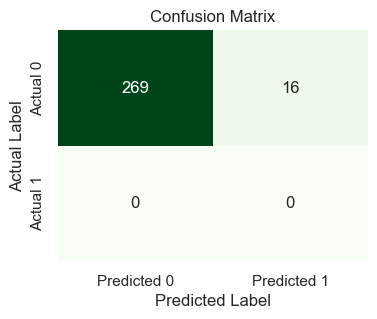

In [510]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# XG Boost Classification 

Accuracy: 0.96

Confusion Matrix:
[[273  12]
 [  0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       285
           1       0.00      0.00      0.00         0

    accuracy                           0.96       285
   macro avg       0.50      0.48      0.49       285
weighted avg       1.00      0.96      0.98       285



C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


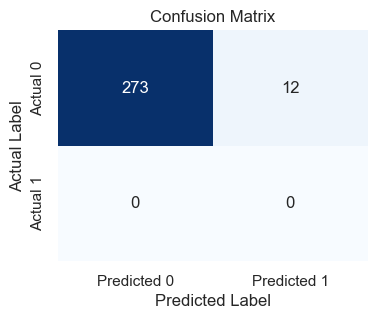

In [511]:
# Create a XG Boost  classifier
classifier =XGBClassifier(random_state=42)

# Train the model on the resampled training set
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classification

C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barath\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


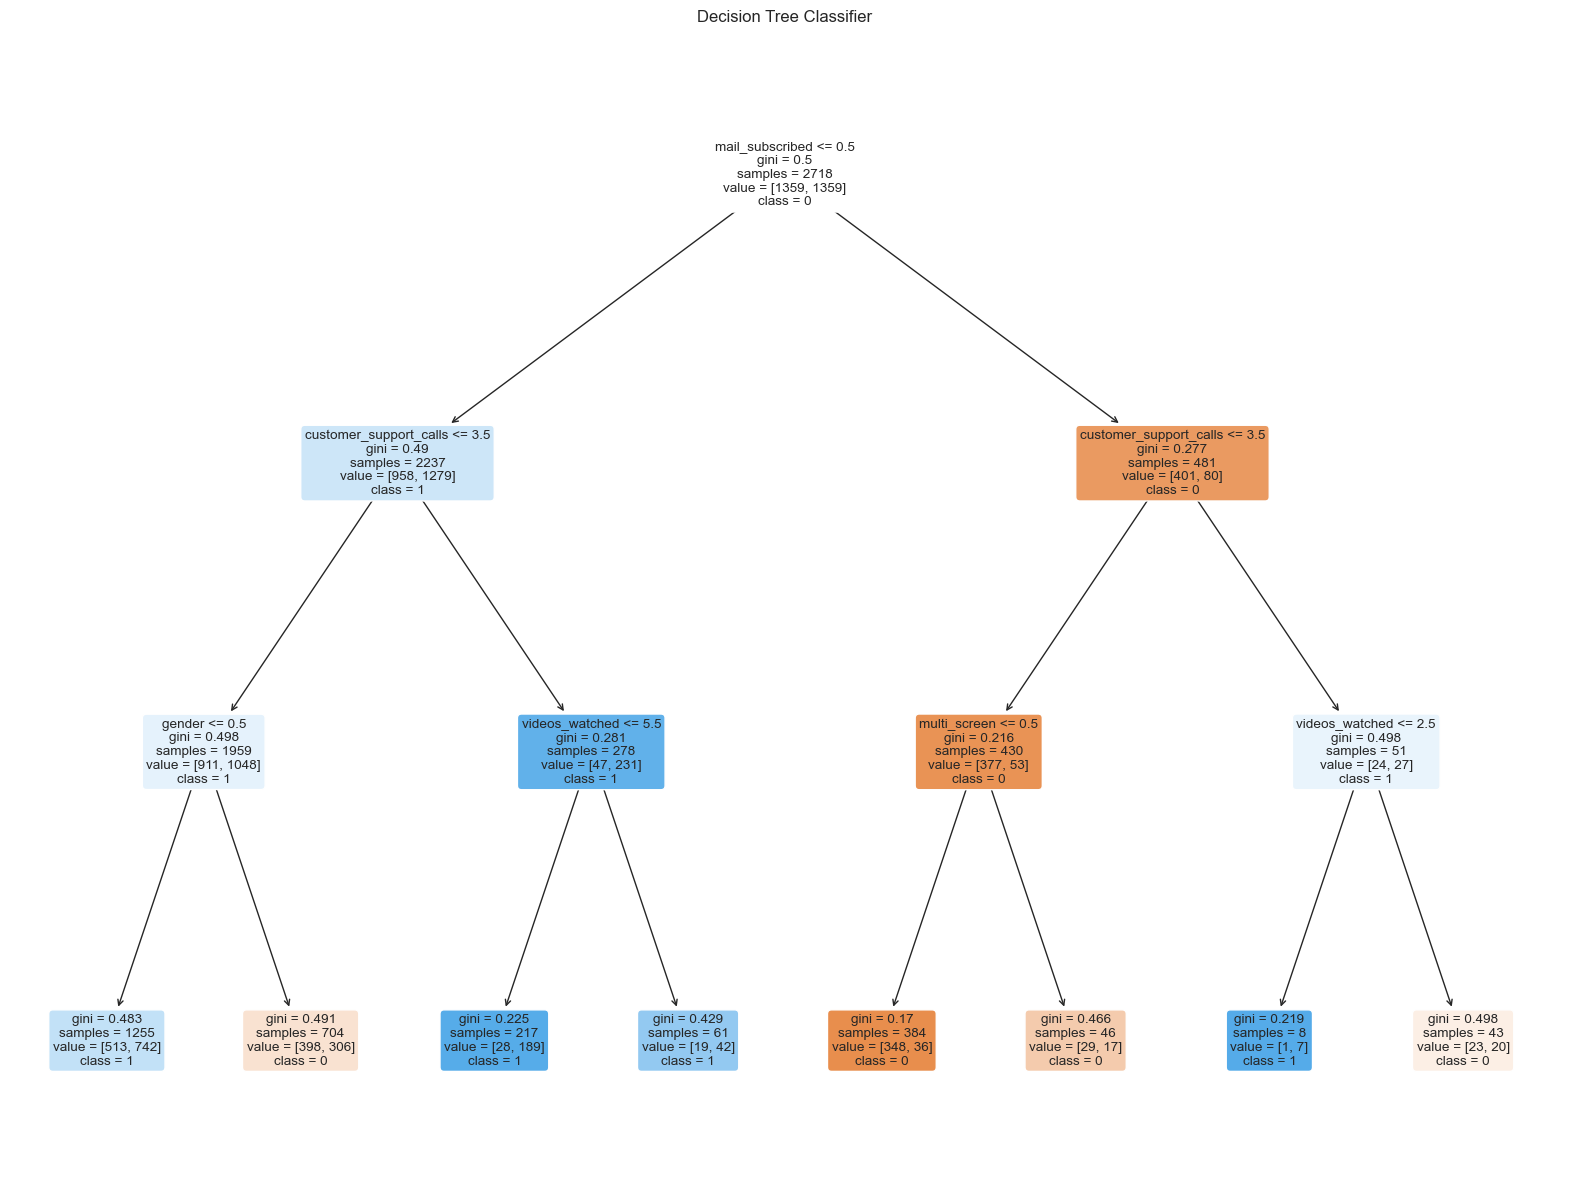

Accuracy: 0.61

Confusion Matrix:
[[174 111]
 [  0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       285
           1       0.00      0.00      0.00         0

    accuracy                           0.61       285
   macro avg       0.50      0.31      0.38       285
weighted avg       1.00      0.61      0.76       285



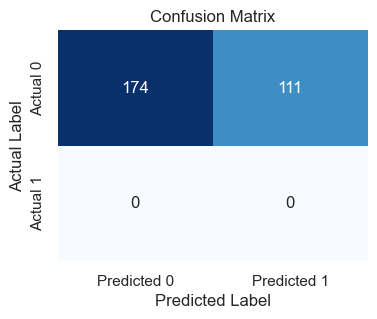

In [512]:
# Create a Decision Tree classifier

max_depth=3
classifier =DecisionTreeClassifier(max_depth=max_depth,random_state=42)

# Train the model on the resampled training set
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.figure(figsize=(20,15))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()